# **A02: Information based learning**

# The Scenario


**The Titanic Dataset**

The Titanic is one of history's most infamous shipwrecks. The Titanic sank on April 15, 1912, during her maiden voyage, after colliding with an iceberg, killing 1502 of 2224 passengers and crew members. This sensational tragedy shocked the international community and led to better safety regulations for ships. Despite some luck being involved in survival, it appears some groups of people had a better chance of surviving.

In this analysis, using passenger data, we will try to determine which kinds of people were more likely to survive.

**Variables:**
* **Pclass - Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)**
* **Survival - Survival(0 = No; 1 = Yes)**
* Name - Name
* **Sex - Sex**
* **Age - Age**
* Sibsp - Number of Siblings/Spouses Aboard 
* Parch - Number of Parents/Children Aboard 
* Ticket - Ticket Number
* Fare - Passenger Fare (British pound) 
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* Boat - Lifeboat
* Body - Body Identification Number
* Home.dest - Home/Destination


-------------------------------
**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- Summary


    

# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import *

## 1b. Load data 

In [2]:
# Read in the data to a variable called titanicData

titanicDataURL = "https://raw.githubusercontent.com/sumitraju/BA2-Class/main/datasets/A02/titanic2.txt"
titanicData=pd.read_csv(titanicDataURL, sep='\t')
titanicDataCopy=titanicData.copy()

## 1c. Explore the data

In [3]:
# Call head() on your data 
titanicDataCopy.head()

,pclass,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes
3,1st,adult,male,yes
4,1st,adult,male,yes


There are 4 columns in the data set where pclass, age, and sex are dependent variables, and survived is the independent variable. 


In [4]:
# Call .shape on your data
titanicDataCopy.shape

(2201, 4)

There are total 2201 rows and 4 columns in the dataset.

In [5]:
# Call info() on your data
titanicDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    2201 non-null   object
 1   age       2201 non-null   object
 2   sex       2201 non-null   object
 3   survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


All the variables are categorical or object type. 

In [6]:
# Call describe() on your data
titanicDataCopy.describe()
#titanicDataCopy.describe(include = 'object')

,pclass,age,sex,survived
count,2201,2201,2201,2201
unique,4,2,2,2
top,crew,adult,male,no
freq,885,2092,1731,1490


Pessager class has 4 unique values, age has 2, sex has 2 and survived has binary values. 

# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

In [7]:
# Call .columns on your data to check out the names of our data's columns 
titanicDataCopy.columns

Index(['pclass', 'age', 'sex', 'survived'], dtype='object')

Let's change the pclass column name to passenger_class

In [8]:
# Using .rename()
#titanicDataCopy.rename(columns = {"pclass":"passenger_class", "sibsp":"num_Siblings_Spouses", "parch":"num_Parents_Children","home.dest":"Home_Destination","boat":"Lifeboat"}, inplace = True)
titanicDataCopy.rename(columns = {"pclass":"passenger_class"}, inplace = True)

In [9]:
# Check out the column names
titanicDataCopy.columns

Index(['passenger_class', 'age', 'sex', 'survived'], dtype='object')

In [10]:
# Call unique() on the gender column to see its unique values 
print("----Passenger class----")
print(titanicDataCopy["passenger_class"].unique())
print("\n")
print("----Age----")
print(titanicDataCopy["age"].unique())
print("\n")
print("----Gender----")
print(titanicDataCopy["sex"].unique())
print("\n")
print("----Survived----")
print(titanicDataCopy["survived"].unique())

----Passenger class----
['1st' '2nd' '3rd' 'crew']


----Age----
['adult' 'child']


----Gender----
['male' 'female']


----Survived----
['yes' 'no']


## 2b. Visualize the data using countplot and mosaic of several variables in the y-axis and the decision on the x-axis


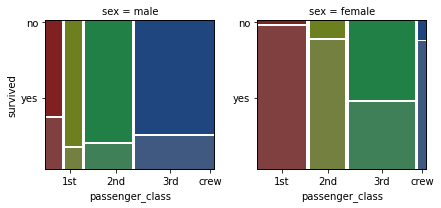

In [11]:
# Exploring our titanicDataCopy dataset

#sns.countplot(x="passenger_class",hue="survived", data=titanicDataCopy)

def my_mosaic(*args,**kwargs):
    mosaic(kwargs['data'], list(args),
           labelizer=lambda k: '',
           ax=plt.gca(),gap=0.02)

g = sns.FacetGrid(titanicDataCopy, col='sex', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'passenger_class', 'survived')
plt.show()

Visualizing the people survival data in passenger class and sex dimension
*   Less than half percent of a male having a 1st class ticket couldn't survive. However, allmost all of the first-class passenger females survived.
*   Most of the female pessenger survived with 2nd class but most of the male pessangers couldn't survive in any of the other classes.
*   Surprisingly, half of the 3rd class females could't survive.
*   There were more crew members than any other passenger category in the male gender.
*   There were more 3rd class passengers than any other passenger category in the female gender.



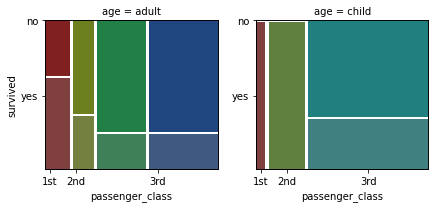

In [12]:
g = sns.FacetGrid(titanicDataCopy, col='age', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'passenger_class', 'survived')
plt.show()

Visualizing the people survival data in passenger class and age dimension
*   Survival was more in the first-class adult passenger category. Adults' 3rd class and crew members' survival rate was the lowest.
*   Almost all the children of the 1st and 2nd class survived. Third-class child survival was significantly less.



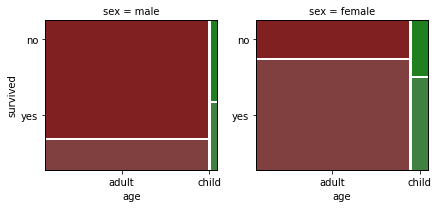

In [13]:
g = sns.FacetGrid(titanicDataCopy, col='sex', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'age', 'survived')
plt.show()

Visualizing the people survival data in sex and age dimension

*   Most of the Adult males couldn't survive 
*   Most of the Adult females survived
*   Male children's survival was below 50% and on the other hand female children's survival was more than 50%


**Similar information can see analyzed by using count plots as well. **

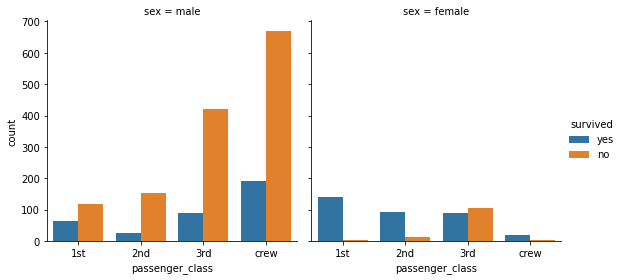

In [14]:
sns.catplot(x="passenger_class", hue="survived", col="sex", data=titanicDataCopy, kind="count", height=4, aspect=1);
plt.show()

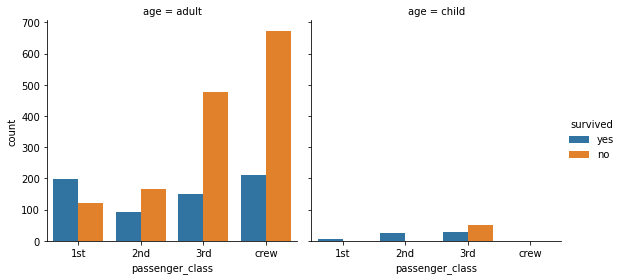

In [15]:
sns.catplot(x="passenger_class", hue="survived", col="age", data=titanicDataCopy, kind="count", height=4, aspect=1);
plt.show()

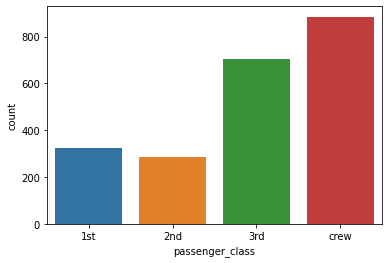

In [16]:
sns.countplot(x="passenger_class", data=titanicDataCopy)
plt.show()

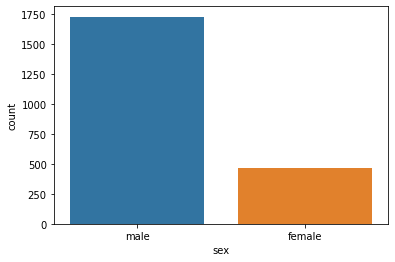

In [17]:
sns.countplot(x="sex", data=titanicDataCopy)
plt.show()

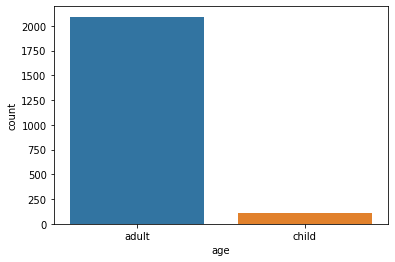

In [18]:
sns.countplot(x="age", data=titanicDataCopy)
plt.show()

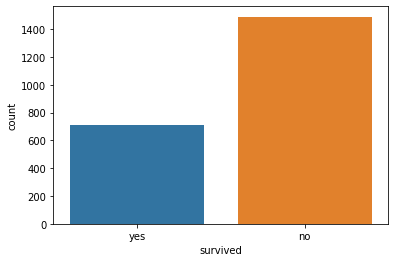

In [19]:
sns.countplot(x="survived", data=titanicDataCopy)
plt.show()

### 2c. Divide the titanicDataCopy subset into X and y

In [20]:
# First of all, let's check the names of the columns of NOPrediction
titanicDataCopy.columns

Index(['passenger_class', 'age', 'sex', 'survived'], dtype='object')

In [21]:
# Let's do our feature selection.

features = ['passenger_class', 'age', 'sex']

# Make an explanatory variable called X, and assign it: titanicDataCopy[features]
X = titanicDataCopy[features]

# Make a dependent variable called y, and assign it: titanicDataCopy.survived
y = titanicDataCopy.survived

### 2d. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [22]:
randomState=3710750

In [23]:
# Call train_test_split on X, y, test_size = 0.25, and random_state = 246
# Make new variables called X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = randomState)

### 2e. Create dummy variables to deal with categorical inputs


In [24]:
# One-hot encoding all features in training set.
# Call get_dummies() on our Pandas objet pd, and pass X_train to it. Reassign the result back to X_train. 
X_train = pd.get_dummies(X_train)

# Do the same, but for X_test
X_test = pd.get_dummies(X_test)

# 3. Modelling


## Model 1: Entropy model - no max_depth
 

In [25]:
# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = randomState)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=3710750)

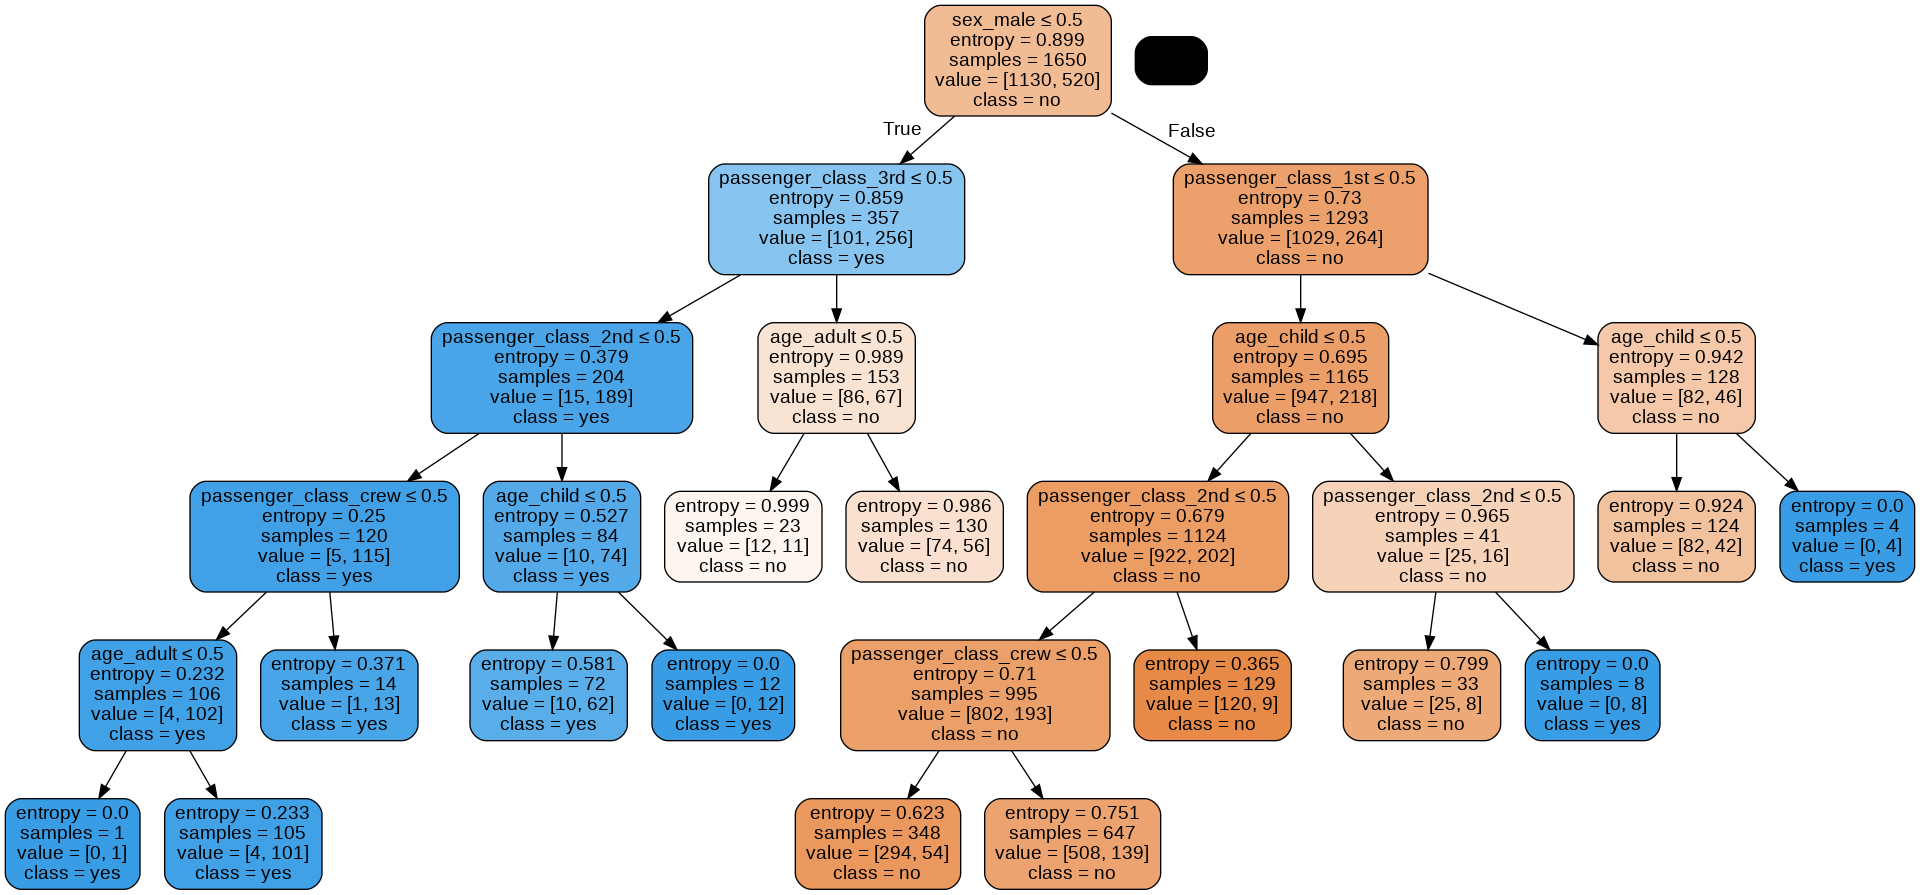

In [26]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [27]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "no"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "no"))

Model Entropy - no max depth
Accuracy: 0.7695099818511797
Balanced accuracy: 0.6736838278068644
Precision score for "Yes" 0.9324324324324325
Precision score for "No" 0.7442348008385744
Recall score for "Yes" 0.3612565445026178
Recall score for "No" 0.9861111111111112


Accuracy of the Entropy model - no max_depth is 0.7695 which means our model is able to predect results currectly. 

### Cross Validation on Model 1: Entropy model


In [28]:
#define cross-validation method to use
cv = LeaveOneOut()
y_train_dummies = pd.get_dummies(y_train)
y_train_dummies.survived = titanicDataCopy.survived.map({'yes':1,'no':0})
#use LOOCV to evaluate model
#scores = cross_val_score(entr_model, X_train, y_train_dummies, scoring='neg_mean_absolute_error', cv=cv)
scores = cross_val_score(entr_model, X_train, y_train_dummies, scoring='accuracy', cv=cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [29]:

scores = absolute(scores)

#view RMSE
#print(sqrt(mean(scores)))

# report performance
#print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

#print(scores)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",scores.mean() * 100)

Accuracy of Model with Cross Validation is: 79.03030303030303


We ran the LeaveOneOut cross validation on our entropy model. We got the accuracy of 79.03% which is better than we got from the entropy model without cross validation.

## Model 2: Gini impurity model - no max_depth



In [30]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'

gini_model= tree.DecisionTreeClassifier(criterion="gini", random_state = randomState)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train , y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=3710750)

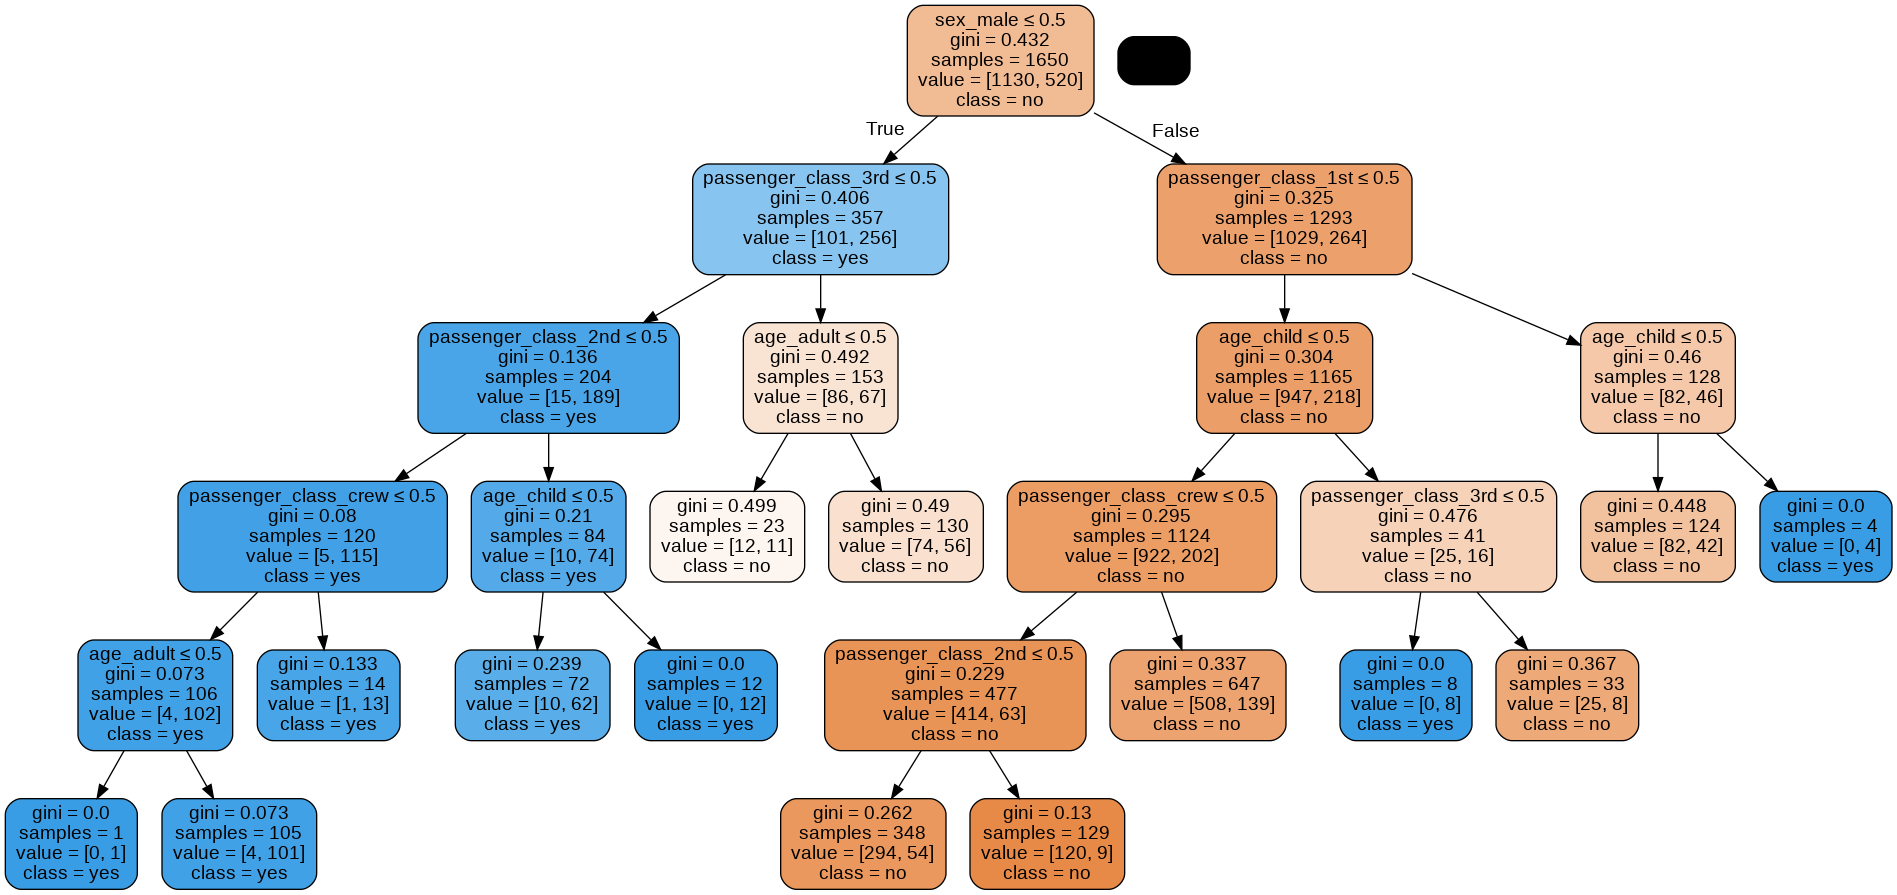

In [31]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"])

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "no"))

Model Gini impurity model
Accuracy: 0.7695099818511797
Balanced accuracy: 0.6736838278068644
Precision score 0.9324324324324325
Recall score 0.9861111111111112


## Model 3: Entropy model - max depth 3


In [33]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = randomState)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3710750)

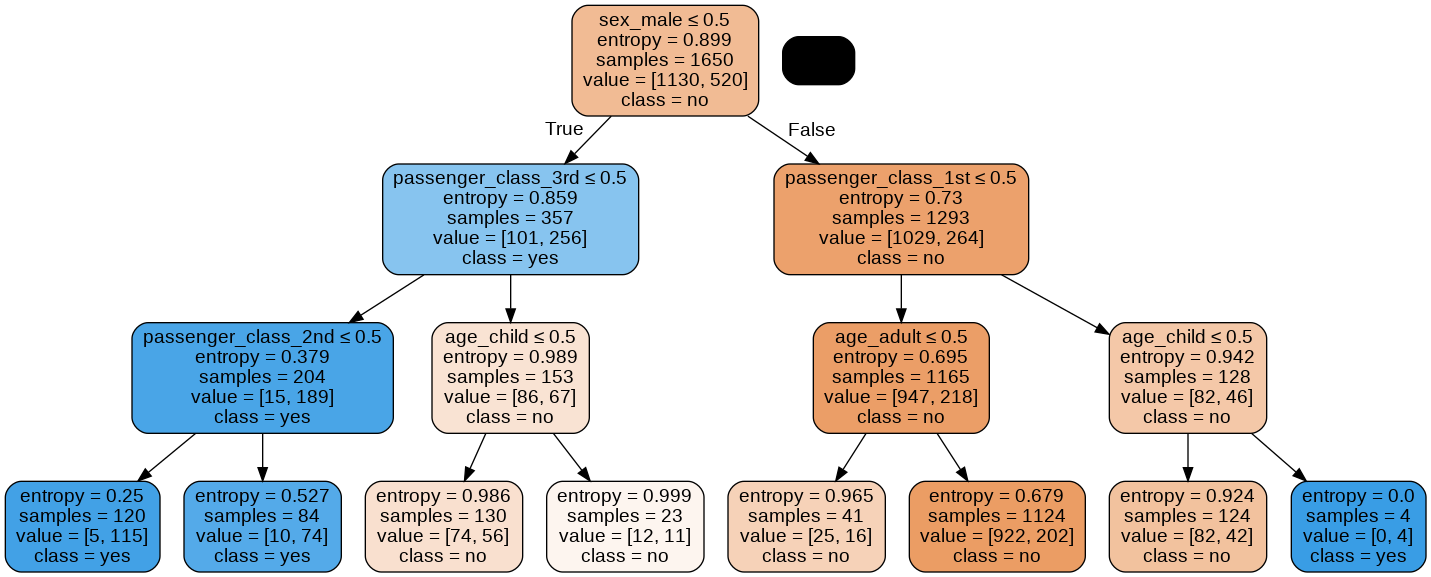

In [34]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"])

# Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "no"))

Model Entropy model max depth 3
Accuracy: 0.764065335753176
Balanced accuracy: 0.6658304246655032
Precision score for "Yes" 0.9295774647887324
Recall score for "No" 0.9861111111111112


### Cross Validation on Model 3: Entropy model - max depth 3


In [36]:
#define cross-validation method to use
cv = LeaveOneOut()

y_train_dummies.survived = titanicDataCopy.survived.map({'yes':1,'no':0})

scores = cross_val_score(entr_model2, X_train, y_train_dummies, scoring='accuracy', cv=cv)

scores = absolute(scores)

print("Accuracy of Model with Cross Validation is:",scores.mean() * 100)

Accuracy of Model with Cross Validation is: 78.54545454545455


## Model 4: Gini impurity  model - max depth 3


In [37]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state = randomState, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=3710750)

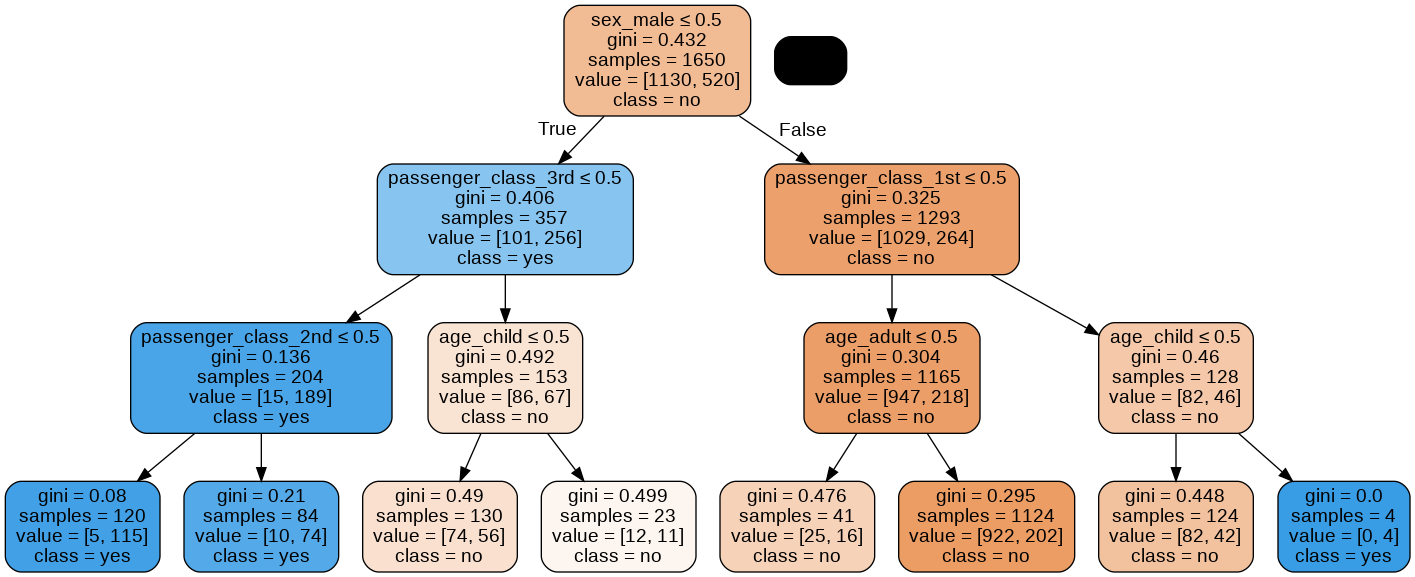

In [38]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "no"))

Gini impurity  model - max depth 3
Accuracy: 0.764065335753176
Balanced accuracy: 0.6658304246655032
Precision score 0.9295774647887324
Recall score 0.9861111111111112


# 4. Evaluating and concluding


*   Accuracy for the Entropy Model and Gini model with no max depth is 76.9%
*   Accuracy for the Entropy model Gini model with max depth 3 is 76.4%
*   Accuracy of Entropy Model and Gini model with no max depth using loocv Cross-Validation is 79.03% which is better than the model without Cross-Validation.
*   Accuracy of Entropy Model and Gini model with max depth 3 using loocv Cross-Validation is 78.54% which is better than the model(max depth 3) without Cross-Validation.
*   Sex was the most significate predector of our model followed by passenger class.
*   Age was least important for predecting the survival value. 
*   Survival count of females was much higher than males 
*   There were not many childen onboard and their overall survival rate was almost 50%.
*   Most of the first-class passengers survived and third-class couldn't 

